# Classifying MNIST digits with dense layers and handcrafted features.

## Loading the image data

In [1]:
from keras.datasets import mnist

(train_images_original, train_labels_original), (test_images_original, test_labels_original) = mnist.load_data()

Using TensorFlow backend.


## Preparing the image data

In [0]:
train_images = train_images_original.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images_original.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

## Preparing the labels

We need to categorically encode the labels.

I printed out examples to see what is going on in this step.

In [3]:
from keras.utils import to_categorical
print(train_labels_original[0])
train_labels = to_categorical(train_labels_original)
test_labels = to_categorical(test_labels_original)
print(train_labels[0])

5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


## Displaying some of the original and prepared image data and labels

In [4]:
train_images.shape

(60000, 784)

In [5]:
train_images_original.shape

(60000, 28, 28)

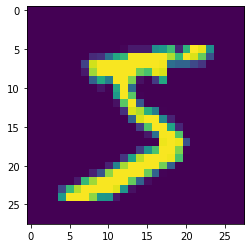

In [6]:
import matplotlib.pyplot as plt
plt.imshow(train_images_original[0])
plt.show()

In [7]:
train_labels.shape

(60000, 10)

In [8]:
train_labels[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [0]:
import numpy as np

In [10]:
np.argmax(train_labels[0])

5

In [11]:
train_labels_original[0]

5

## Handcrafted feature #1: average intensity

I started this problem kind of late and didn't realize how daunting it would be.  I tried to do an easier hand crafter feature first but ran into a lot of little technical issues that I wasn't prepared for. I apologize.  I left the code here just so you can what I was attempting to do.

In [12]:
import numpy as np

intensity_ftrs = np.zeros(60000)
for i in range(60000):
  intensity_ftrs[i] += np.average(train_images[i])

train_images = np.column_stack((train_images, intensity_ftrs))
train_images.shape

(60000, 785)

## The network architecture

In [13]:
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=((28 * 28) + 1,)))
network.add(layers.Dense(10, activation='softmax'))
network.summary()




Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               402432    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 407,562
Trainable params: 407,562
Non-trainable params: 0
_________________________________________________________________


## The compilation step

In [14]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

## The training step

In [15]:
epochs = 10
history = network.fit(train_images, 
                      train_labels, 
                      epochs=epochs, 
                      batch_size=128, 
                      validation_data=(test_images, test_labels))

ValueError: ignored

## Display the training/test loss/accuracy

In [0]:
history_dict = history.history
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, epochs + 1)

In [0]:
plt.plot(epochs_range, loss_values, 'bo', label='Training loss')
plt.plot(epochs_range, test_loss_values, 'ro', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [0]:
acc_values = history_dict['acc']
test_acc_values = history_dict['val_acc']

In [0]:
plt.plot(epochs_range, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs_range, test_acc_values, 'ro', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Showing some misclassified digits

In [0]:
predictions = network.predict(test_images)

In [0]:
predictions[0]

In [0]:
np.argmax(predictions[0])

In [0]:
test_labels_original[0]

In [0]:
predicted_labels = np.argmax(predictions, axis=1) 
predicted_labels = predicted_labels.astype('uint8')

In [0]:
predicted_labels

In [0]:
wrong_indices = [i for i in range(10000) if predicted_labels[i] != test_labels_original[i]]

In [0]:
# The quantity below is equal to the test accuracy reported by the network fit method.
1.0 - len(wrong_indices) / 10000.0

In [0]:
# This show the ith misclassified digit. 
i = 4
wrong_index = wrong_indices[i]  

In [0]:
predicted_labels[wrong_index]

In [0]:
test_labels_original[wrong_index]

In [0]:
plt.imshow(test_images_original[wrong_index])
plt.show()